In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
#Importing the csv from local folder
houses = pd.read_csv('housing.csv')
#A quick look at whats come in from the file
houses.info

<bound method DataFrame.info of      Unnamed: 0     price  lotsize  bedrooms  bathrms  stories driveway  \
0             1   42000.0     5850         3        1        2      yes   
1             2   38500.0     4000         2        1        1      yes   
2             3   49500.0     3060         3        1        1      yes   
3             4   60500.0     6650         3        1        2      yes   
4             5   61000.0     6360         2        1        1      yes   
..          ...       ...      ...       ...      ...      ...      ...   
541         542   91500.0     4800         3        2        4      yes   
542         543   94000.0     6000         3        2        4      yes   
543         544  103000.0     6000         3        2        4      yes   
544         545  105000.0     6000         3        2        2      yes   
545         546  105000.0     6000         3        1        2      yes   

    recroom fullbase gashw airco  garagepl prefarea  
0        no  

In [21]:
#Exercise is to create two bar charts in one figure, house price by bathrooms and one for property with driveway or not

In [22]:
#First find the number of bathrooms and the aversage price
#As we can see, we have 546 prices which would not be used for bar chart, so we need to bin or use average 

In [23]:
#So we should read in and collect all prices for each number of bathrooms e.g. average price for 3 bathroom house
#initilise the variables
max = 0; max_of=0; cur_no=0
run_tot=[0]*5
count=[0]*700
collect_average=[]
price_tot =[]*5
#price_tot[1]=0; price_tot[2]=0; price_tot[3]=0; price_tot[4]=0
price_tot = [0]*10

#Since I have decided to use a for loop, I need the range of the loops
max = houses["bathrms"].max() #max value that object occurs in bedrooms
len_col = len(houses["price"]) #full length of price column

#Now start to gather total of prices for each number of bathrooms
for i in range(len_col): #Loop full length of column
       
    for j in range(1,max+1):
        if houses["bathrms"][i]==j:
               
            price_tot[j]= price_tot[j]+houses["price"][i] #Varable for totaling up for eavch number of bathrooms
            count[j]= count[j]+1 #number of values that go into total to work out average

for k in range(1,max+1): #now counting up how often each number of bathrooms appears and producing the average for each bathroom number
    print("For ",k,"bathrooms"," there is an average price of ", price_tot[k]/count[k])
    #Collecting the average price per number of bathrooms for use in the plotting process below
    collect_average.append(price_tot[k]/count[k]) 
    if run_tot[k] > max_of:
        max_of = run_tot[k]
        cur_no = k


For  1 bathrooms  there is an average price of  60153.23383084577
For  2 bathrooms  there is an average price of  88702.94736842105
For  3 bathrooms  there is an average price of  104030.0
For  4 bathrooms  there is an average price of  175000.0


In [24]:
#So above is round up of data for price v number of bathrooms
#Now find the number of houses with/out driveways as a function/definition

In [25]:
def tally_yes_no(target): #used to tally yes/no columns
    sum0 = 0; sum1 = 0
    len_col = len(target)
   
    for i in range(len_col):  #totaling up each feature as how often found
        if (target[i]=="yes"):
            sum0=sum0+1
        if (target[i]=="no"):
            sum1=sum1+1 
      
    #now counting up how often each yes and no appears
    yes_count= sum0
    no_count = sum1
      
    return yes_count,no_count

In [26]:
#So next, collect mean price for houses with driveway v no driveways for use plotting below 

#Pull out the three relevent columns from houses dataframe above
price_with_drive_alldata = houses[["price","driveway","bathrms"]]

#Select mean price with driveway for each number of bathrooms

price_with_drive_1btrm = price_with_drive_alldata[["price"] & (price_with_drive_alldata["driveway"]=="yes")& (price_with_drive_alldata["bathrms"]==1) ]
price_with_drive_only_1btrm = price_with_drive_1btrm["price"].mean()
print("price with drive only 1 bthrm",'\n',price_with_drive_only_1btrm)
#1 Bathroom
price_with_drive_2btrm = price_with_drive_alldata[["price"] & (price_with_drive_alldata["driveway"]=="yes")& (price_with_drive_alldata["bathrms"]==2) ]
price_with_drive_only_2btrm = price_with_drive_2btrm["price"].mean()
print("price with drive only 2 bthrm",'\n',price_with_drive_only_2btrm)
#2 Bathrooms
price_with_drive_3btrm = price_with_drive_alldata[["price"] & (price_with_drive_alldata["driveway"]=="yes")& (price_with_drive_alldata["bathrms"]==3) ]
price_with_drive_only_3btrm = price_with_drive_3btrm["price"].mean()
print("price with drive only 3 bthrm",'\n',price_with_drive_only_3btrm)
#3 Bathrooms
price_with_drive_4btrm = price_with_drive_alldata[["price"] & (price_with_drive_alldata["driveway"]=="yes")& (price_with_drive_alldata["bathrms"]==4) ]
price_with_drive_only_4btrm = price_with_drive_4btrm["price"].mean()
print("price with drive only 4 bthrm",'\n',price_with_drive_only_4btrm)

#Now mean price for no Driveway
#1 Bathroom
price_without_drive_1btrm = price_with_drive_alldata[["price"] & (price_with_drive_alldata["driveway"]=="no")& (price_with_drive_alldata["bathrms"]==1) ]
price_without_drive_only_1btrm = price_without_drive_1btrm["price"].mean()
print("price without drive only 1 bthrm",'\n',price_without_drive_only_1btrm)
#2 Bathrooms
price_without_drive_2btrm = price_with_drive_alldata[["price"] & (price_with_drive_alldata["driveway"]=="no")& (price_with_drive_alldata["bathrms"]==2) ]
price_without_drive_only_2btrm = price_without_drive_2btrm["price"].mean()
print("price without drive only 2 bthrm",'\n',price_without_drive_only_2btrm)
#3 Bathrooms
price_without_drive_3btrm = price_with_drive_alldata[["price"] & (price_with_drive_alldata["driveway"]=="no")& (price_with_drive_alldata["bathrms"]==3) ]
price_without_drive_only_3btrm = price_without_drive_3btrm["price"].mean()
print("price without drive only 3 bthrm",'\n',price_without_drive_only_3btrm)
#3 Bathrooms
price_without_drive_4btrm = price_with_drive_alldata[["price"] & (price_with_drive_alldata["driveway"]=="no")& (price_with_drive_alldata["bathrms"]==4) ]
price_without_drive_only_3btrm = price_without_drive_4btrm["price"].mean()
print("price without drive only 4 bthrm",'\n',price_without_drive_only_4btrm)
#There are no 4 bathroom houses with out driveway


price with drive only 1 bthrm 
 62785.93841642229
price with drive only 2 bthrm 
 91834.38655462184
price with drive only 3 bthrm 
 117787.5
price with drive only 4 bthrm 
 175000.0
price without drive only 1 bthrm 
 45435.983606557376
price without drive only 2 bthrm 
 62085.71428571428
price without drive only 3 bthrm 
 49000.0
price without drive only 4 bthrm 
 0


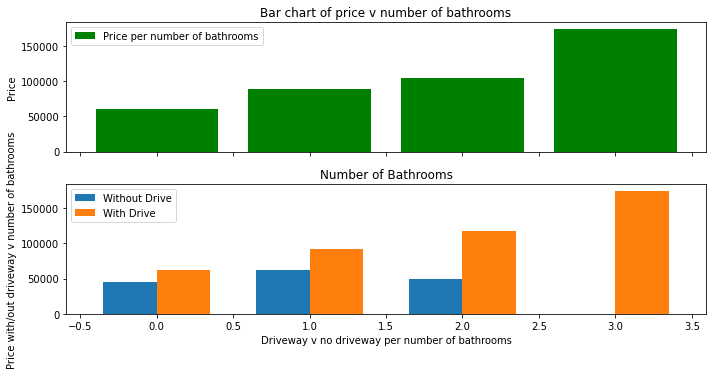

In [27]:
# Now let's make two bar plots/charts - one for the average price for number of bathrooms, and second number of batrooms and driveways 
# now set chart parameters
#Position bars
x1_position = [0,1,2,3]
#Y data for chart 1
y1 = collect_average

#Y data chart 2
y2 =  [price_without_drive_only_1btrm,price_without_drive_only_2btrm,price_without_drive_only_3btrm,price_without_drive_only_4btrm]

# Define our fig, axes
fig, (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(10, 5), 
                               gridspec_kw={'height_ratios': [4, 4]},
                               sharex=True)

x2 = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Now Plot our data
ax1.bar(x1_position, y1, bottom=None, align='center',color='green',label = 'Price per number of bathrooms')
#ax2.bar(x1_position, y2, bottom=None, align='center',color='red',label = 'Number of driveways')
ax2.bar(x2 - width/2, price_without_mean, width, label='Without Drive')
ax2.bar(x2 + width/2, price_with_mean, width, label='With Drive')

# Let's add labels and a legend
ax1.set_ylabel("Price")
ax2.set_ylabel("Price with/out driveway v number of bathrooms")
ax2.set_xlabel("Driveway v no driveway per number of bathrooms")
# Add axis titles
ax1.set_title("Bar chart of price v number of bathrooms")
ax2.set_title("Number of Bathrooms")
#framealpha=1, shadow=True, borderpad=1

ax1.legend(loc ='best')
ax2.legend(loc ='best')

#Seperate a bit
plt.tight_layout()

In [ ]:
#Now Chart 1 Complete

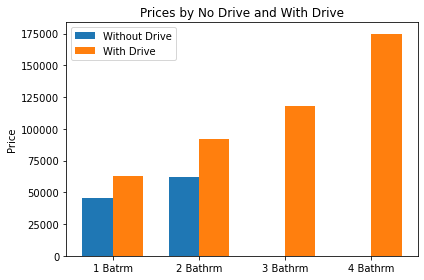

In [28]:
#Set out data for second chart
labels = ['1 Batrm', '2 Bathrm', '3 Bathrm', '4 Bathrm']
price_without_mean = [price_without_drive_only_1btrm,price_without_drive_only_2btrm,price_without_drive_only_3btrm,price_without_drive_only_4btrm]
price_with_mean = [price_with_drive_only_1btrm,price_with_drive_only_2btrm,price_with_drive_only_3btrm,price_with_drive_only_4btrm]

# Define our fig, axes
fig, ax = plt.subplots()
# Now Plot our data
ax.bar(x2 - width/2, price_without_mean, width, label='Without Drive')
ax.bar(x2 + width/2, price_with_mean, width, label='With Drive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Price')
ax.set_title('Prices by No Drive and With Drive')
ax.set_xticks(x2)
ax.set_xticklabels(labels)


ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
#This is the end of the assignment